In [2]:
from hearing_assistive import *
import numpy as np

%matplotlib inline

# Get Wave Segments

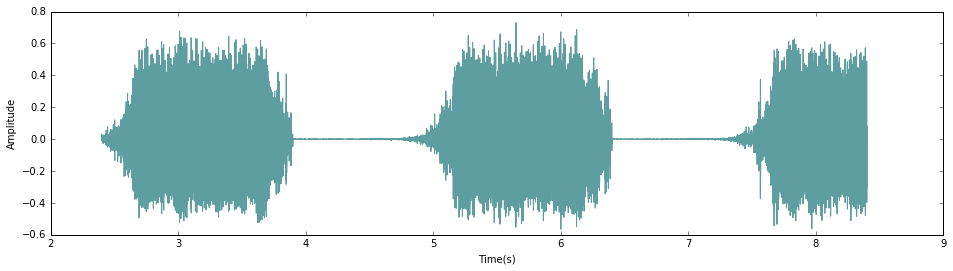

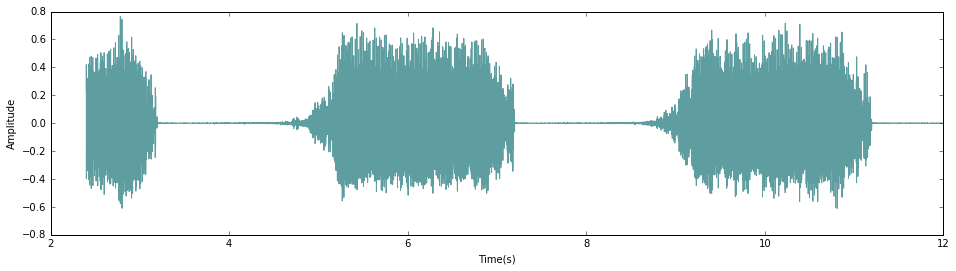

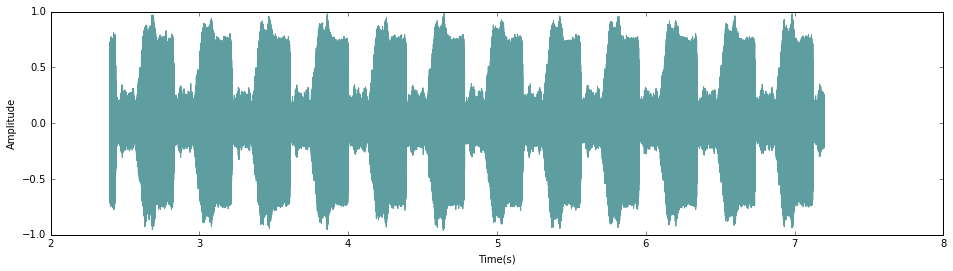

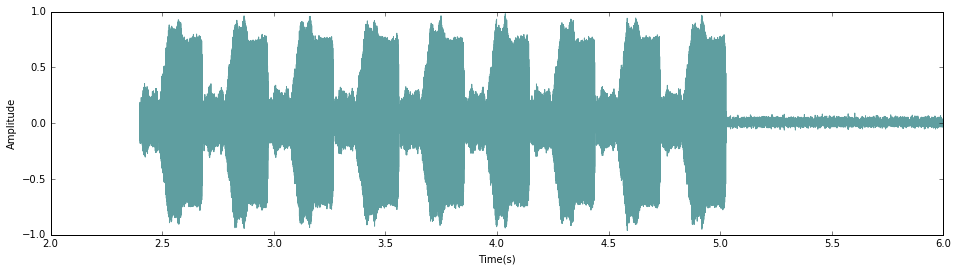

In [3]:
alarm = read_wave('Sounds/school_fire_alarm.wav')
alarm_seg_map = alarm.partition()   # default, 2.4 second segments

alarm_seg1 = alarm_seg_map[7]
alarm_seg1.plot()

alarm_seg2 = alarm_seg_map[10]
alarm_seg2.plot()

tones = read_wave('Sounds/plectron_tones.wav')
tones_seg_map = tones.partition()   # default, 2.4 second segments

tones_seg1 = tones_seg_map[6]
tones_seg1.plot()

tones_seg2 = tones_seg_map[5]
tones_seg2.plot()

# Create and Train SVM Classifier (may take a while)

In [4]:
clf = svm.SVC(kernel='rbf', C=100)

dataset = []
targetset = []

dataset, targetset = init_set(100)

new_dataset, new_targetset = generate_feature_set(alarm_seg1, 3)
dataset, targetset = append_set(dataset, targetset, new_dataset, new_targetset)

new_dataset, new_targetset = generate_feature_set(tones_seg1, 4)
dataset, targetset = append_set(dataset, targetset, new_dataset, new_targetset)

new_dataset, new_targetset = generate_feature_set(alarm_seg2, 3)
dataset, targetset = append_set(dataset, targetset, new_dataset, new_targetset)

new_dataset, new_targetset = generate_feature_set(tones_seg2, 4)
dataset, targetset = append_set(dataset, targetset, new_dataset, new_targetset)

dataset = np.asarray(dataset)
targetset = np.asarray(targetset)

print dataset.shape

dataset = dataset.reshape((dataset.shape[0], -1))

clf.fit(dataset, targetset)

Training New Dataset
####################################################################################################

Training New Dataset
####################################################################################################

Training New Dataset
####################################################################################################

Training New Dataset
####################################################################################################

(700, 119, 26)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Save Classifier to Disk

In [7]:
from sklearn.externals import joblib
joblib.dump(clf, 'SVC/svc.pk1')

['SVC/svc.pk1',
 'SVC/svc.pk1_01.npy',
 'SVC/svc.pk1_02.npy',
 'SVC/svc.pk1_03.npy',
 'SVC/svc.pk1_04.npy',
 'SVC/svc.pk1_05.npy',
 'SVC/svc.pk1_06.npy',
 'SVC/svc.pk1_07.npy',
 'SVC/svc.pk1_08.npy',
 'SVC/svc.pk1_09.npy',
 'SVC/svc.pk1_10.npy',
 'SVC/svc.pk1_11.npy']